Camille Balo
Project 3--Web Scraping

import statements

In [72]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt

Send a GET request, check if the status returned is successful, and then extract if it is

In [126]:
#this is the URL for one of the webpages I will be scraping data from
url='https://fbref.com/en/comps/21/Primera-Division-Stats'
#send a GEt request to the URL
response = requests.get(url)
#get the HTTP status code 
status = response.status_code
#if the status is 200 (successful), extract the HTML and store it in a bs object
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Error. Status code {status}.")

Display the "prettified" data

In [127]:
print(soup.prettify())

<!DOCTYPE html>
<html class="no-js" data-root="/home/fb/deploy/www/base" data-version="klecko-" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport"/>
  <link href="https://cdn.ssref.net/req/202304191" rel="dns-prefetch"/>
  <!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->
  <script async="true" type="text/javascript">
   (function() {
	var host = window.location.hostname;
	var element = document.createElement('script');
	var firstScript = document.getElementsByTagName('script')[0];
	var url = 'https://cmp.quantcast.com'
	    .concat('/choice/', 'XwNYEpNeFfhfr', '/', host, 
		    '/choice.js?tag_version=V2');
	var uspTries = 0;
	var uspTriesLimit = 3;
	element.async = true;
	element.type = 'text/javascript';
	element.src = url;
	
	firstScript.parentNode.insertBefore(element, firstScript);
	
	function makeStub() {
	    var TCF_LOCAT

Create a function that sends a GET request and validates that the status code was successful--this function does the same as the initial GET request

In [18]:
def web_req(url):
    response = requests.get(url)
    status = response.status_code
    if status == 200:
        return response.text
    else:
        print(f"Error. Status code {status}.")
        return ""

Get all of the URLs for the teams in the 2023 Primera Division

In [78]:
#this is the URL that will be the one we are moving in between and grabbing the other webpages from (for the teams)
url_start='https://fbref.com/en/comps/21/Primera-Division-Stats'
url_base='https://fbref.com'
#call the web_req function to validate the webpage
page = web_req(url_start)
#store in a beautiful soup object
soup = bs(page)
#this id is where the Liga Profesional data is
liga_prof_table = soup.find(id="div_results2023211_overall").tbody
#create an empty list to store the urls
team_url_list = []
#iterate through all of the rows of the liga profesional table
for row in liga_prof_table.find_all('tr') :
    #find where the href of the url and concatenate it to the base url
    team_url = url_base + row.find(attrs={'data-stat':'team'}).a['href']
    #add the full team url to the list
    team_url_list.append(team_url)
team_url_list

['https://fbref.com/en/squads/ef99c78c/River-Plate-Stats',
 'https://fbref.com/en/squads/66da6009/San-Lorenzo-Stats',
 'https://fbref.com/en/squads/87a920fa/Rosario-Cent-Stats',
 'https://fbref.com/en/squads/ceda2145/Talleres-Stats',
 'https://fbref.com/en/squads/a4570206/Defensa-y-Just-Stats',
 'https://fbref.com/en/squads/7765008b/Club-Atletico-Belgrano-Stats',
 'https://fbref.com/en/squads/11b6dba8/Lanus-Stats',
 'https://fbref.com/en/squads/d01a653b/Argentinos-Jun-Stats',
 'https://fbref.com/en/squads/8e20e13d/Racing-Club-Stats',
 'https://fbref.com/en/squads/df734df9/Estudiantes-Stats',
 'https://fbref.com/en/squads/9bf4eaf4/Newells-OB-Stats',
 'https://fbref.com/en/squads/3cbfa767/Platense-Stats',
 'https://fbref.com/en/squads/ac9a09b4/Godoy-Cruz-Stats',
 'https://fbref.com/en/squads/0e92bf17/Tigre-Stats',
 'https://fbref.com/en/squads/e2f19203/Instituto-Atletico-Central-Cordoba-Stats',
 'https://fbref.com/en/squads/41c139b6/Velez-Sarsf-Stats',
 'https://fbref.com/en/squads/e9ae8

Get all the team names by creating a function

In [40]:
def get_teams(soup):
    #create an empty list to hold all of the team names
    teams = []
    #find the table that holds the team information
    stats_table = soup.find(class_ = 'stats_table').tbody

    for row in stats_table.find_all('tr'):
        #locate where the team name is
        team = row.a.text
        #append the team to the list
        teams.append({'Team':team})

    
    return teams


In [41]:
#display the teams
teams_df = pd.DataFrame(get_teams(soup))
teams_df

,Team
0,River Plate
1,San Lorenzo
2,Rosario Cent
3,Talleres
4,Defensa y Just
5,Club Atlético Belgrano
6,Lanús
7,Argentinos Jun
8,Racing Club
9,Estudiantes


Since the teams are pulled directly from the website in the order of their ranking, the code above displays the teams also in order of the top team and descending.

Create a function to get all the team wins

In [36]:
def get_team_wins(soup):
    #create an empty list to hold all of the team names and wins
    team_wins = []
    #find the table that holds the team information
    stats_table = soup.find(class_ = 'stats_table').tbody

    for row in stats_table.find_all('tr'):
        #locate where the team name is
        team = row.a.text
        #locate where the wins are
        wins = row.find(attrs={'data-stat':'wins'}).text
        #append the team name and wins to team_wins
        team_wins.append({'Team':team, 'Wins':wins})
    
    return team_wins


In [37]:
#display the teams and wins
team_wins_df = pd.DataFrame(get_team_wins(soup))
team_wins_df

,Team,Wins
0,River Plate,10
1,San Lorenzo,7
2,Rosario Cent,6
3,Talleres,6
4,Defensa y Just,6
5,Club Atlético Belgrano,6
6,Lanús,5
7,Argentinos Jun,5
8,Racing Club,5
9,Estudiantes,5


Create a function to get the top team scorer of each team

In [44]:
def get_top_scorer(soup):
    #create an empty list to hold all of the top scorers
    top_scorers = []
    #find the table that holds the player's name (top scorer)
    stats_table = soup.find(class_ = 'stats_table').tbody

    #iterate over the stats_table
    for row in stats_table.find_all('tr'):
        #locate the top scorer for each team
        player = row.find(attrs={'data-stat':'top_team_scorers'}).text
        #locate where the team name is
        team = row.a.text
        #append the team and top scorer to the list
        top_scorers.append({'Team':team, 'Top Scorer':player})

    return top_scorers

In [46]:
#display the teams and top scorers
team_scorers_df = pd.DataFrame(get_top_scorer(soup))
team_scorers_df

,Team,Top Scorer
0,River Plate,Lucas Beltrán - 5
1,San Lorenzo,"Adam Bareiro, Andrés Vombergar - 3"
2,Rosario Cent,Alejo Véliz - 4
3,Talleres,Michael Santos - 5
4,Defensa y Just,Nicolás Fernández - 7
5,Club Atlético Belgrano,Pablo Vegetti - 7
6,Lanús,Leandro Díaz - 6
7,Argentinos Jun,Gabriel Ávalos - 7
8,Racing Club,Matías Rojas - 6
9,Estudiantes,Mauro Boselli - 5


Create a function to get all the losses for the team

In [49]:
def get_team_losses(soup):
    #create an empty list to hold all of the team names and losses
    team_losses = []
    #find the table that holds the team information
    stats_table = soup.find(class_ = 'stats_table').tbody

    for row in stats_table.find_all('tr'):
        #locate where the team name is
        team = row.a.text
        #locate where the losses are
        losses = row.find(attrs={'data-stat':'losses'}).text
        #append the team name and losses to team_losses
        team_losses.append({'Team':team, 'Losses':losses})
    
    return team_losses


In [50]:
#display the teams and losses
team_losses_df = pd.DataFrame(get_team_losses(soup))
team_losses_df

,Team,Losses
0,River Plate,2
1,San Lorenzo,2
2,Rosario Cent,2
3,Talleres,3
4,Defensa y Just,3
5,Club Atlético Belgrano,3
6,Lanús,3
7,Argentinos Jun,4
8,Racing Club,4
9,Estudiantes,4


Create a function to get the team's total points

In [51]:
def get_team_points(soup):
    #create an empty list to hold all of the team names and points
    team_points = []
    #find the table that holds the team information
    stats_table = soup.find(class_ = 'stats_table').tbody

    for row in stats_table.find_all('tr'):
        #locate where the team name is
        team = row.a.text
        #locate where the points are
        points = row.find(attrs={'data-stat':'points'}).text
        #append the team name and losses to team_losses
        team_points.append({'Team':team, 'Points':points})
    
    return team_points


In [128]:
#display the teams and points
team_points_df = pd.DataFrame(get_team_points(soup))
team_points_df

,Team,Points
0,River Plate,30
1,San Lorenzo,24
2,Rosario Cent,22
3,Talleres,21
4,Defensa y Just,21
5,Club Atlético Belgrano,21
6,Lanús,19
7,Argentinos Jun,18
8,Racing Club,18
9,Estudiantes,18


Scrape player names from Team Stats Page (create a function)

In [69]:
def get_players(soup2):
    #make an empty list to store players 
    all_players = []
    #find where the stats table is (it holds the players names)
    stats_table2 = soup2.find(class_='stats_table').tbody
    #iterate over the rows
    for row in stats_table2.find_all('tr'):
        #find where the player's name is
        player = row.find(attrs={'data-stat':'player'}).text
        #append the name to the list
        all_players.append(player)
    return all_players


In [60]:
#display all the names for the River Plate team
page_url = 'https://fbref.com/en/squads/ef99c78c/River-Plate-Stats'
page = web_req(page_url)
#create a soup object
soup2 = bs(page)
#call the function to get the player names
allplayers = get_players(soup2)
allplayers

['Franco Armani',
 'Ignacio Fernández',
 'Enzo Díaz',
 'Milton Casco',
 'Enzo Pérez',
 'José Paradela',
 'Leandro González Pirez',
 'Rodrigo Aliendro',
 'Lucas Beltrán',
 'Ezequiel Barco',
 'Paulo Díaz',
 'Pablo Solari',
 'Miguel Borja',
 'Salomón Rondón',
 'Nicolás De La Cruz',
 'Marcelo Herrera',
 'Robert Rojas',
 'Jonatan Maidana',
 'Emanuel Mammana',
 'Agustín Palavecino',
 'Matías Suárez',
 'Santiago Simón',
 'Franco Alfonso',
 'Bruno Zuculini',
 'Tomás Castro',
 'Ezequiel Centurión',
 'Héctor David Martínez',
 'Elías Gómez',
 'Franco Petroli']

Create a web scraping pipeline to get the players name from all the teams in the Liga Profesional team using the URL list created in the beginning-- 

IMPORTANT NOTE: Sometimes when running this too many times consecutively, it will result in a status code 429 error, meaning "Too Many Requerst" however, I validated that the code worked so it should still be ok

In [134]:
#make a variable that spices the original url list-- this helps to prevent the 429 Too Many Requests error code
#however, running the code back to back may still result in that error code
mod_url_list = team_url_list[:10]

#iterate over the urls
for url in mod_url_list:
    #get the page
    page = web_req(url)
    #create a soup object
    soup2 = bs(page)
    #call the function to get the players names
    allplayers = get_players(soup2)
    print(allplayers)


['Franco Armani', 'Ignacio Fernández', 'Enzo Díaz', 'Milton Casco', 'Enzo Pérez', 'José Paradela', 'Leandro González Pirez', 'Rodrigo Aliendro', 'Lucas Beltrán', 'Ezequiel Barco', 'Paulo Díaz', 'Pablo Solari', 'Miguel Borja', 'Salomón Rondón', 'Nicolás De La Cruz', 'Marcelo Herrera', 'Robert Rojas', 'Jonatan Maidana', 'Emanuel Mammana', 'Agustín Palavecino', 'Matías Suárez', 'Santiago Simón', 'Franco Alfonso', 'Bruno Zuculini', 'Tomás Castro', 'Ezequiel Centurión', 'Héctor David Martínez', 'Elías Gómez', 'Franco Petroli']
['Malcom Braida', 'Rafa Pérez', 'Jalil Elías', 'Gastón Hernández', 'Augusto Batalla', 'Federico Gattoni', 'Adam Bareiro', 'Andrés Vombergar', 'Nahuel Barrios', 'Carlos Sánchez', 'Gonzalo Luján', 'Ezequiel Cerutti', 'Ivan Leguizamon', 'Agustín Martegani', 'Agustín Giay', 'Facundo Altamirano', 'Nicolás Blandi', 'Gastón Campi', 'Elian Irala', 'Francisco Perruzzi', 'Gonzalo Maroni', 'Mariano Peralta', 'Matías Hernández', 'Diego Calcaterra', 'José Devecchi', 'Francisco Flo

Plots using matplotlib

This plot shows the top 5 teams and their current points

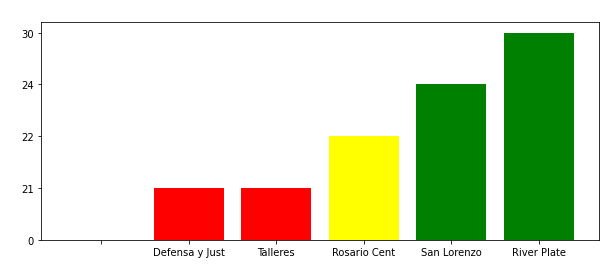

In [133]:
#get the teams and their points
teams_5 = get_team_points(soup)

#get the first 5 elements in the list (since the list is pulled from the website in descending order-- most to least points)
#splice the list to get the top 5
teams_5 = teams_5[:5]

#empty list for points and teams
points_5 = []
teams_5_only = []

#get the points
for val in teams_5:
    points_5.append(val['Points'])

#get only the teams
for val in teams_5:
    teams_5_only.append(val['Team'])


#teams will be the x val
#[::-1] reverses the order for the graph later
x_val = teams_5_only[::-1]
#points will be the y val
y_val = points_5[::-1]

#pad the x and y bars so all the bars appear on the graph
x_val.insert(0, '')
y_val.insert(0, '0')

#create a list of colors to color the bars of the graph
colors = ['white', 'red', 'red', 'yellow', 'green', 'green']


#make the bar graph
plt.figure(figsize=(10,4))
plt.bar(x_val, y_val, color=colors)
plt.xlabel("Teams", color='white')
plt.ylabel("Points", color='white')
plt.title('Top 5 Teams', color='white')

#display the graph
plt.show()


This plot will show the 5 teams with the most wins

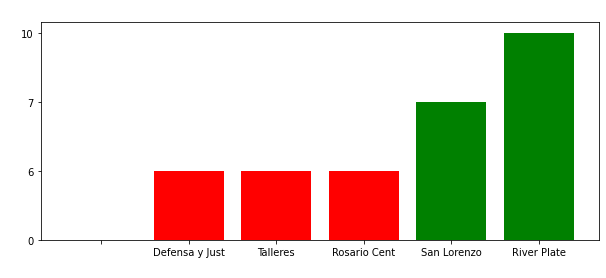

In [132]:
#get the teams and their points
win_teams_5 = get_team_wins(soup)

#get the first 5 elements in the list
#splice the list to get the 5 with the most wins
win_teams_5 = win_teams_5[:5]

#empty list for points and teams
win_5 = []
teams_win_only = []

#get the points
for val in win_teams_5:
    win_5.append(val['Wins'])

#get only the teams
for val in win_teams_5:
    teams_win_only.append(val['Team'])


#teams will be the x val
#[::-1] reverses the order for the graph later
x_val = teams_win_only[::-1]
#points will be the y val
y_val = win_5[::-1]

#padd the x and y bars so all the bars appear on the graph
x_val.insert(0, '')
y_val.insert(0, '0')

#create list of colors to color the bars of the graph
colors = ['white', 'red', 'red', 'red', 'green', 'green']

#make the bar graph
plt.figure(figsize=(10,4))
plt.bar(x_val, y_val, color=colors)
plt.xlabel("Teams", color='white')
plt.ylabel("Wins", color='white')
plt.title('5 Teams With Most Wins', color='white')

#display the graph
plt.show()


This plot will show the top 5 scorers out of the Liga Profesional

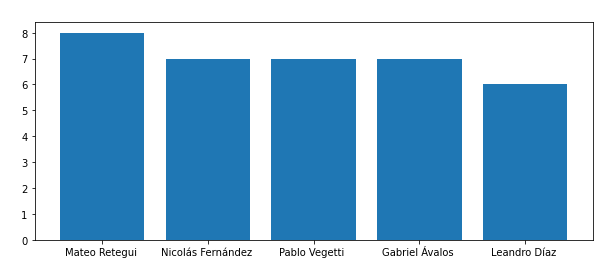

In [151]:
#get the top scorers
top_scorer_list = get_top_scorer(soup)

#create an empty list for the names and scores
top_players = []

#get all of the player names and scores and store in a new list
for val in top_scorer_list:
    scorer = val['Top Scorer']
    #append to list
    top_players.append(scorer)

#create an empty dictionary to hold the name and goals
name_goal_dict = {}

#split the name from the goals number
for val in top_players:
    #split the value
    spliced = val.split('-')

    #convert the numeric value to a int
    spliced[1] = int(spliced[1])

    #add to the dictionary
    name_goal_dict[spliced[0]] = spliced[1]

#get the top 5
#use a lambda function to quickly make a function that sorts the dictionary--there is not need to create an actual function still it will only 
#be used in this instance and not across the board
#item[1] get the value of the dictionry and reverse=True puts it in descending order
top_5_scorers = sorted(name_goal_dict.items(), key=lambda item: item[1], reverse=True)[:5]

#create empty lists for the names and goals
names_5 = []
goals_5 = []

#split the top 5 scorers list into two lists with names and goals
for val in top_5_scorers:
    names_5.append(val[0])
    goals_5.append(val[1])


#set the x vals and y vals
x_val = names_5
y_val = goals_5

#make the bar graph
plt.figure(figsize=(10,4))
plt.bar(x_val, y_val)
plt.xlabel("Players", color='white')
plt.ylabel("Goals", color='white')
plt.title('5 Players with most Goals', color='white')

#display the graph
plt.show()


